In [19]:
# import all the needed packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [21]:
# import the london borough data set
data_set = "https://data.london.gov.uk/download/uk-house-price-index/70ac0766-8902-4eb5-aab5-01951aaed773/UK%20House%20price%20index.xls"

In [23]:
# turn the data into dataframe and clean the data so it can be readable
properties = pd.read_excel(data_set, sheet_name='Average price', index_col= None) 
properties = properties.transpose()
properties = properties.reset_index()
properties.columns = properties.iloc[0]
properties = properties.drop(index=0)
properties = properties.reset_index()
properties = properties.rename(columns= {"Unnamed: 0":"Borough", properties.columns[2]:"Post Codes"})
properties.head()

,index,Borough,Post Codes,1995-01-01 00:00:00,1995-02-01 00:00:00,1995-03-01 00:00:00,1995-04-01 00:00:00,1995-05-01 00:00:00,1995-06-01 00:00:00,1995-07-01 00:00:00,...,2023-12-01 00:00:00,2024-01-01 00:00:00,2024-02-01 00:00:00,2024-03-01 00:00:00,2024-04-01 00:00:00,2024-05-01 00:00:00,2024-06-01 00:00:00,2024-07-01 00:00:00,2024-08-01 00:00:00,2024-09-01 00:00:00
0,1,City of London,E09000001,91448.98487,82202.77314,79120.70256,77101.20804,84409.14932,94900.51244,110128.0423,...,810438,824748,827534,817772,789329,791847,787551,749978,756445,717967
1,2,Barking & Dagenham,E09000002,50460.2266,51085.77983,51268.96956,53133.50526,53042.24852,53700.34831,52113.12157,...,336436,330121,329134,335068,336000,336768,333790,340060,338438,337875
2,3,Barnet,E09000003,93284.51832,93190.16963,92247.52435,90762.87492,90258.00033,90107.23471,91441.24768,...,580035,576872,563792,568587,574531,582252,586707,590952,599836,596165
3,4,Bexley,E09000004,64958.09036,64787.92069,64367.49344,64277.66881,63997.13588,64252.32335,63722.70055,...,390661,393449,393818,394805,396248,398144,403193,404003,406279,407059
4,5,Brent,E09000005,71306.56698,72022.26197,72015.76274,72965.63094,73704.04743,74310.48167,74127.03788,...,507424,517358,522581,514638,501844,503818,533339,532085,547064,547370


In [24]:
# melt the data by separating the month and price so it can be easy to understand
properties = properties.melt(id_vars=["index","Borough","Post Codes"], var_name="Month", value_name="Average Price")
properties.head()

,index,Borough,Post Codes,Month,Average Price
0,1,City of London,E09000001,1995-01-01 00:00:00,91448.98487
1,2,Barking & Dagenham,E09000002,1995-01-01 00:00:00,50460.2266
2,3,Barnet,E09000003,1995-01-01 00:00:00,93284.51832
3,4,Bexley,E09000004,1995-01-01 00:00:00,64958.09036
4,5,Brent,E09000005,1995-01-01 00:00:00,71306.56698


In [25]:
# delete the rows of boroughs that do not belong in 32 london Boroughs
non_borough = ['City of London','Inner London', 'Outer London', 'NORTH EAST', 'NORTH WEST', 'YORKS & THE HUMBER', 'EAST MIDLANDS', 'WEST MIDLANDS', 'EAST OF ENGLAND', 'LONDON', 'SOUTH EAST', 'SOUTH WEST', 'England']
for i in properties["Borough"]:
    if i in non_borough:
        properties = properties.drop(properties[properties["Borough"] == i].index)

# clean the data again to make it same 
properties = properties.drop("index" , axis=1)
properties = properties = properties.rename(columns= {"level_0":"Index"})
properties = properties.dropna()
properties = properties.reset_index()
properties.head()

,index,Borough,Post Codes,Month,Average Price
0,1,Barking & Dagenham,E09000002,1995-01-01 00:00:00,50460.2266
1,2,Barnet,E09000003,1995-01-01 00:00:00,93284.51832
2,3,Bexley,E09000004,1995-01-01 00:00:00,64958.09036
3,4,Brent,E09000005,1995-01-01 00:00:00,71306.56698
4,5,Bromley,E09000006,1995-01-01 00:00:00,81671.47692


In [26]:
# separte the year from the month cloumn into new cloum
def exact_year(x):
    return x.year
properties["Year"] = pd.to_datetime(properties["Month"]).apply(exact_year)

287414.7734


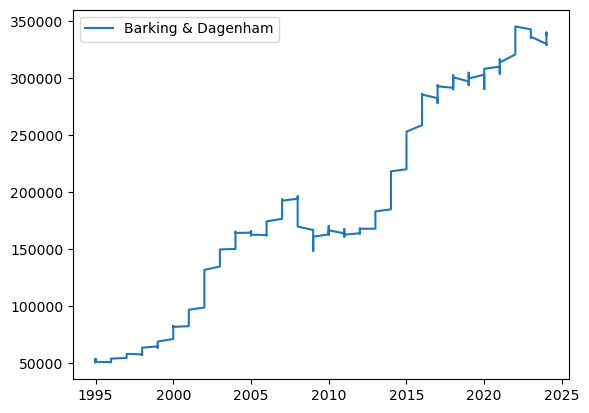

502880.48167999997


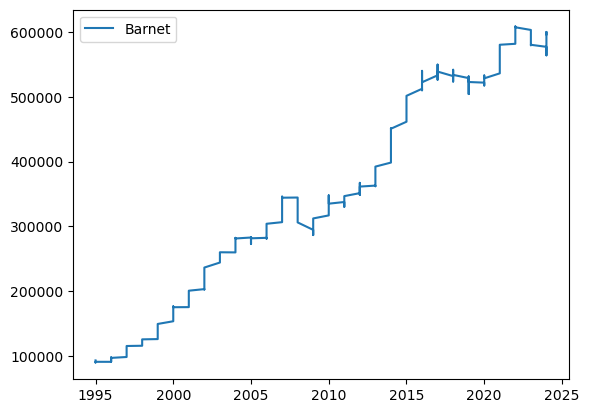

342100.90963999997


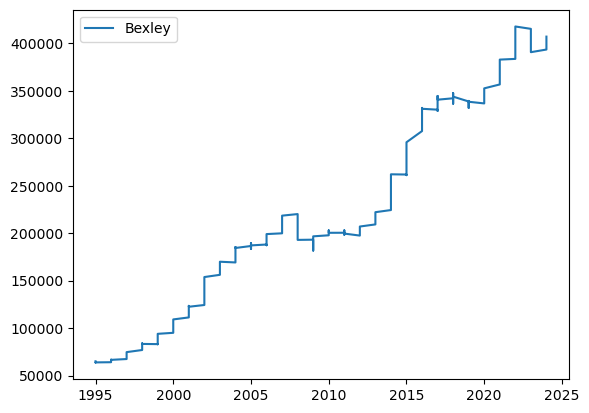

476063.43302


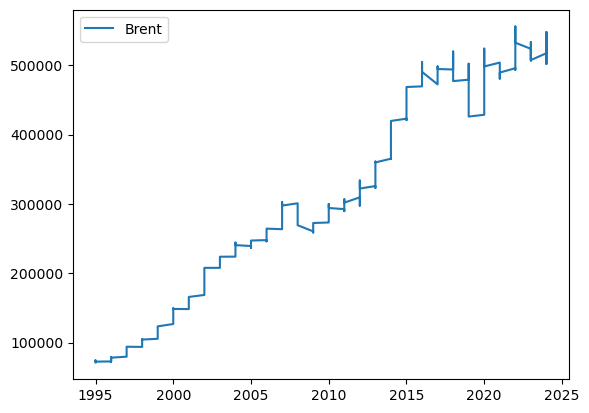

429315.52308


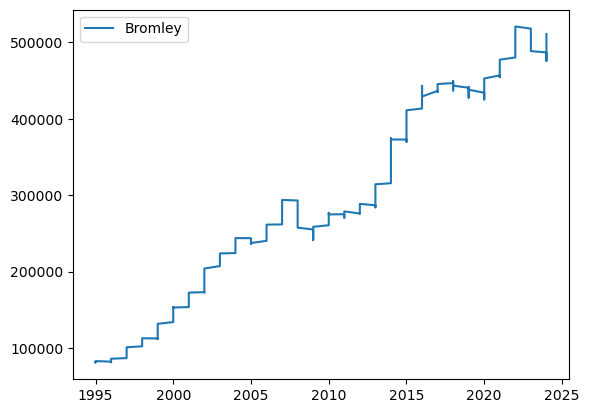

694236.1119


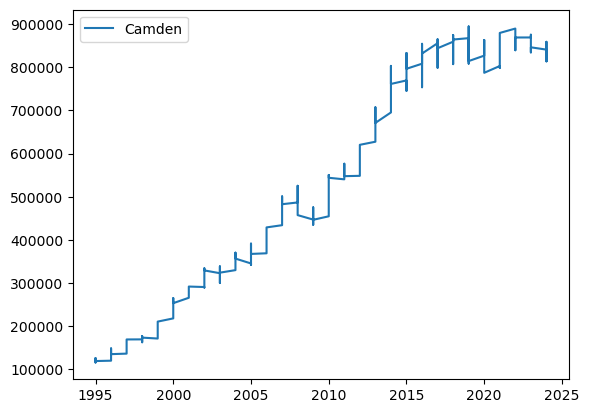

334508.83775


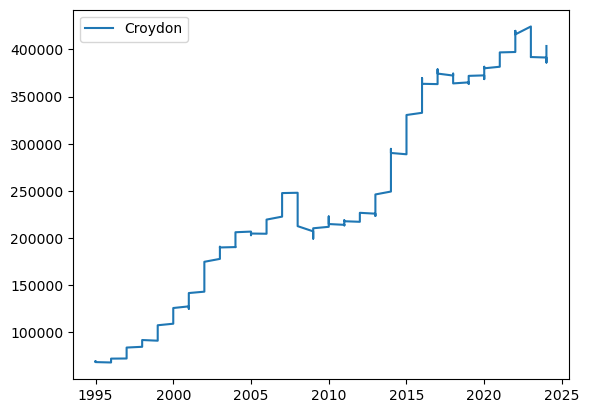

477994.10930999997


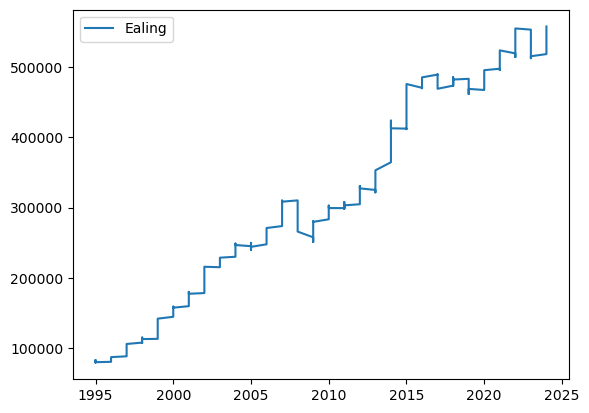

379996.30903999996


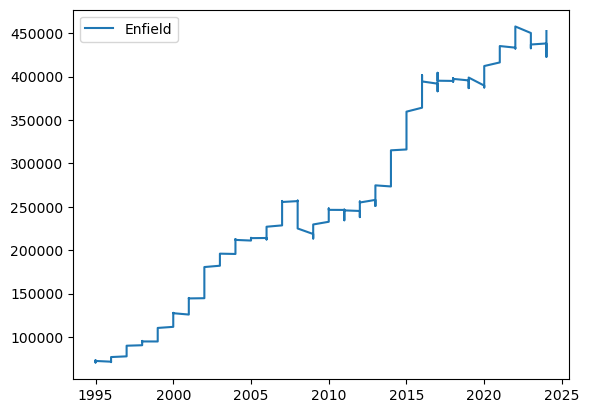

400495.89831


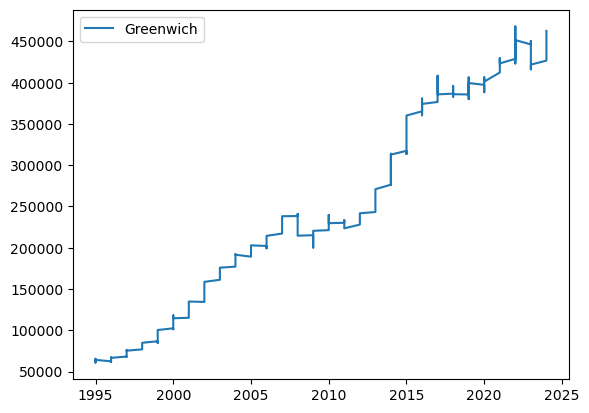

533974.47363


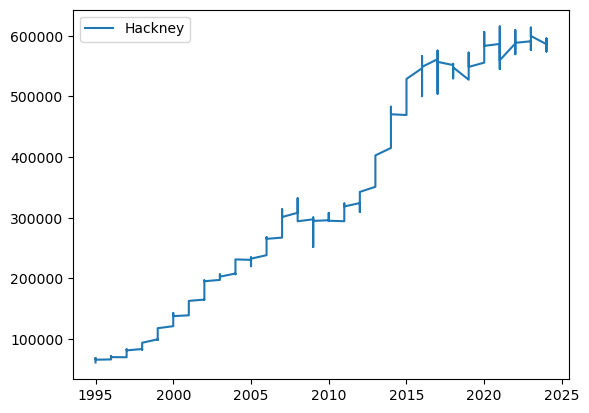

624179.1398


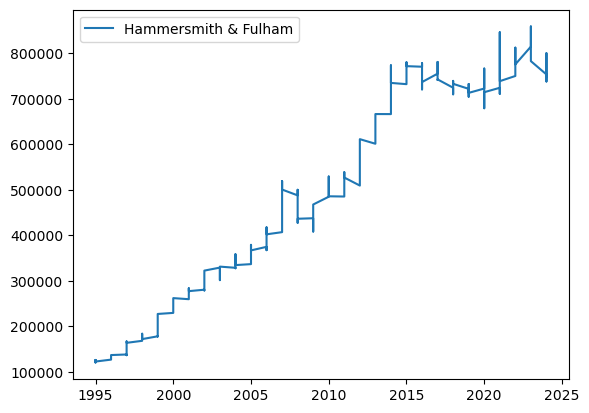

514863.43053


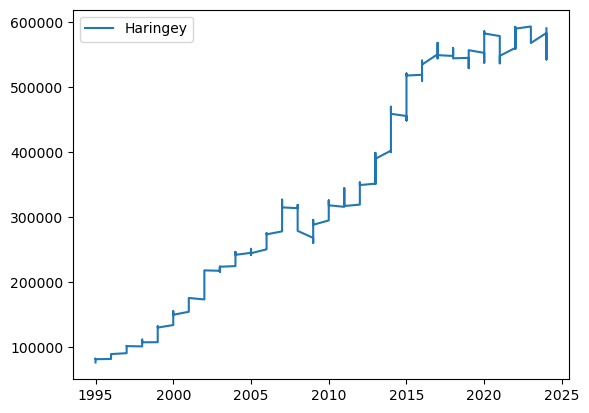

453702.47401


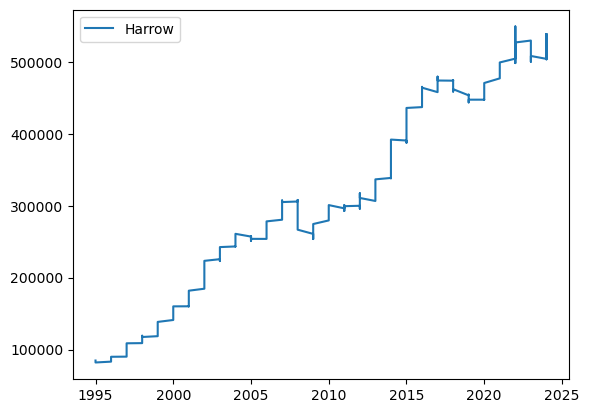

359301.86225999997


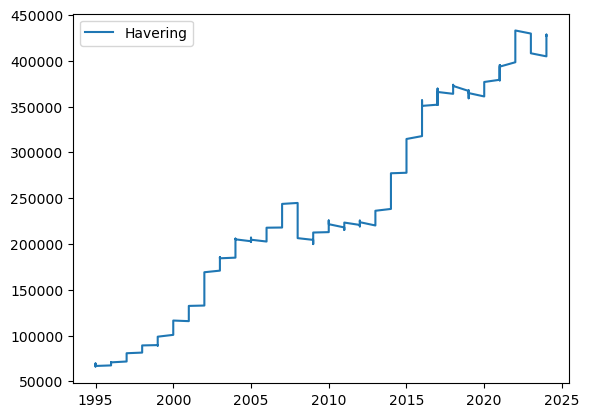

385961.17036


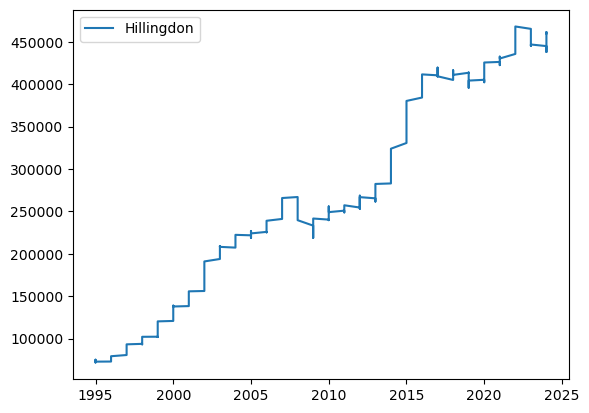

388507.29463


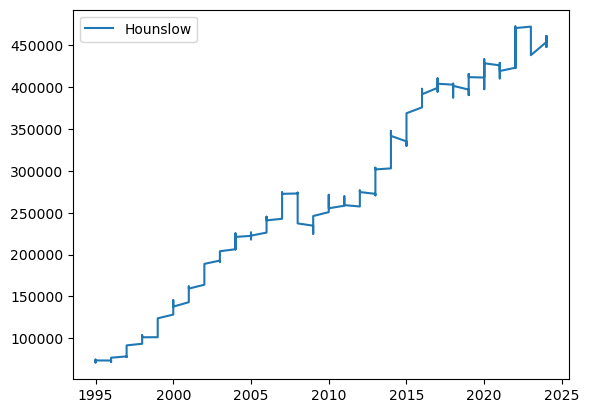

576695.51443


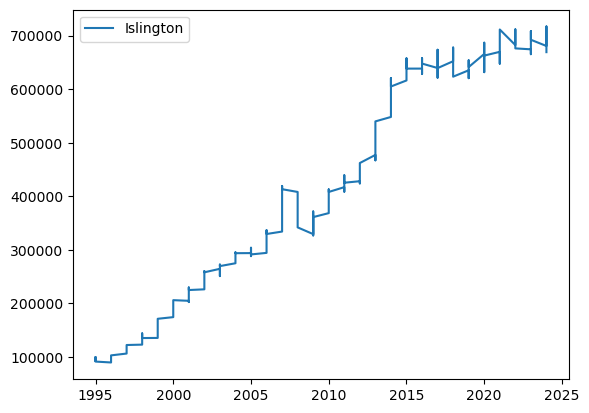

1000540.1674


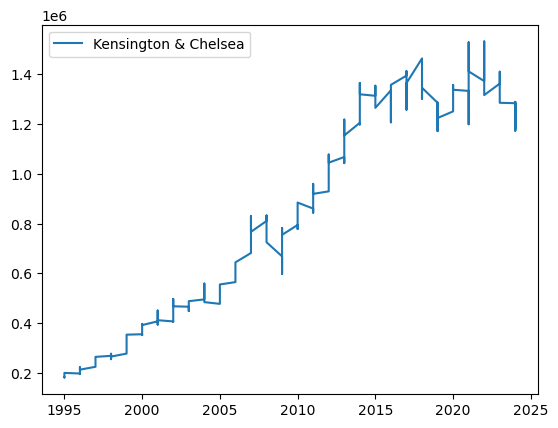

476453.15157


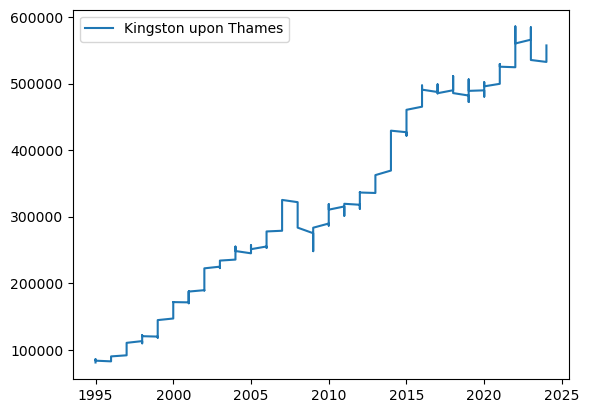

482814.01157


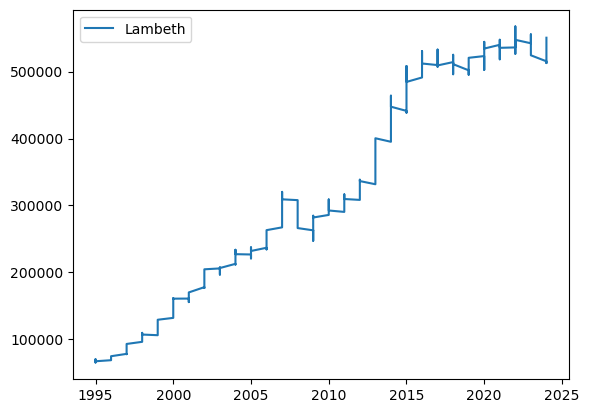

406718.73891


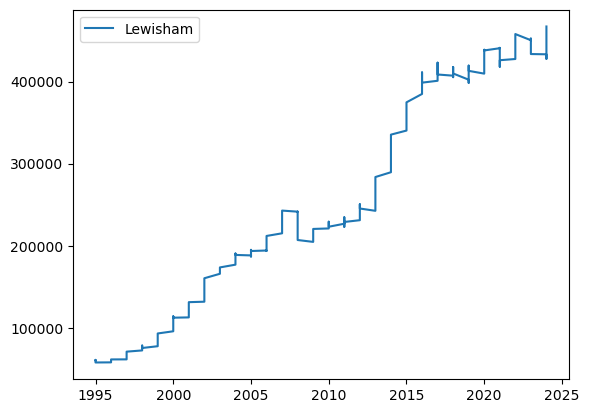

497397.38670000003


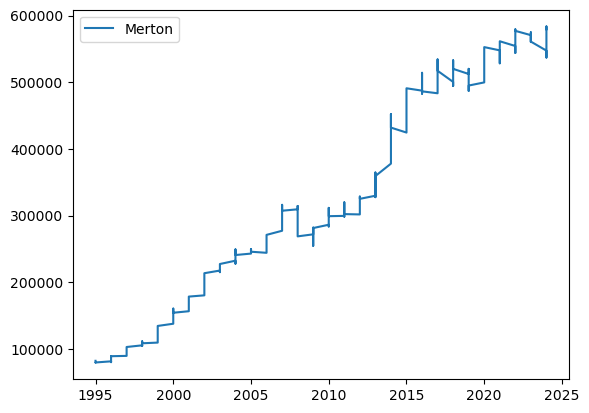

369235.68081


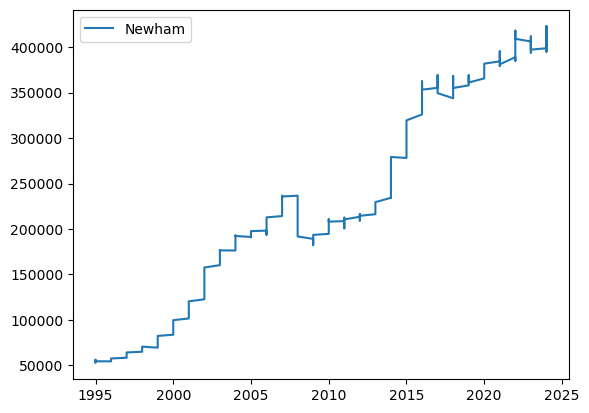

425982.41563


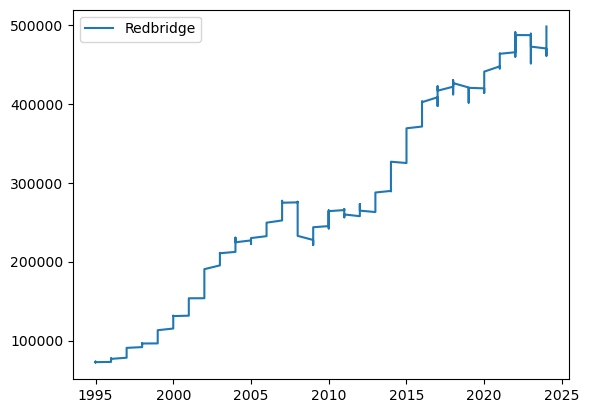

638578.8755


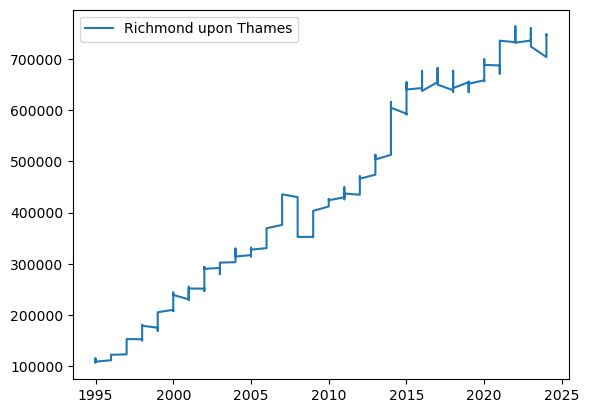

426871.79656


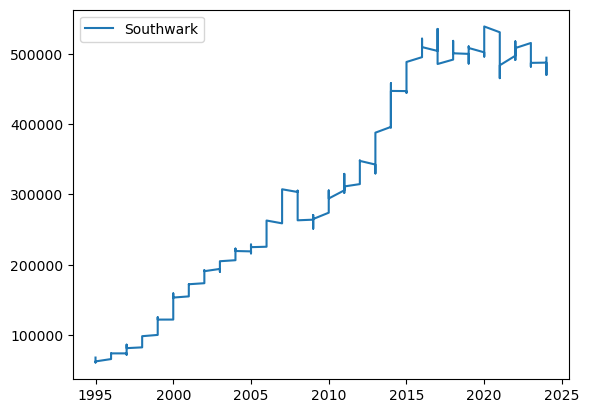

367729.02642999997


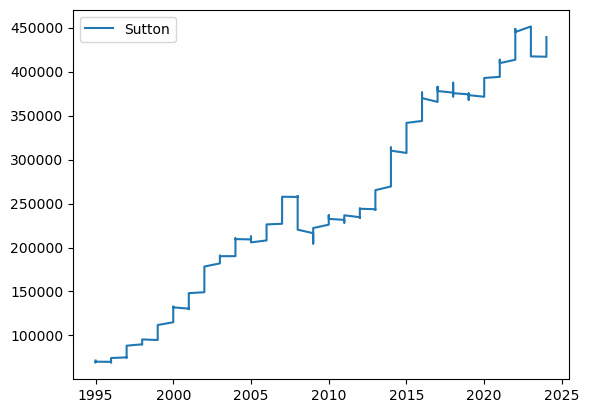

421833.81005


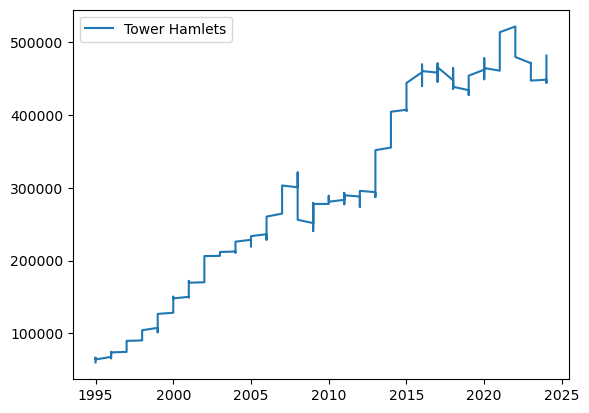

445924.55087


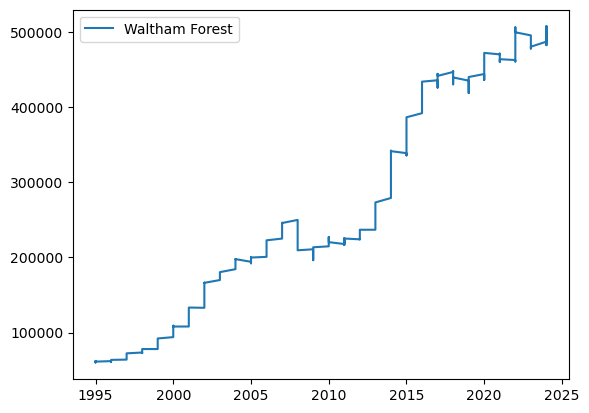

526575.95619


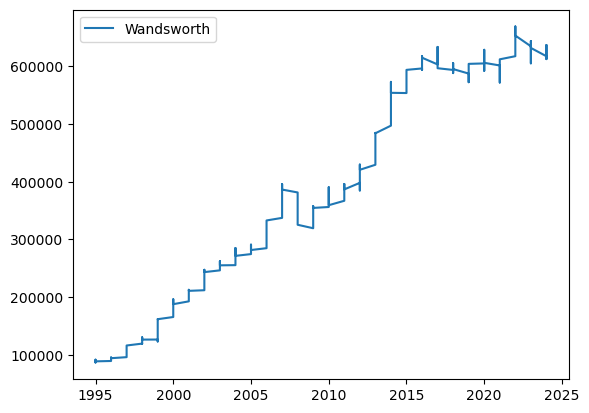

836888.7228


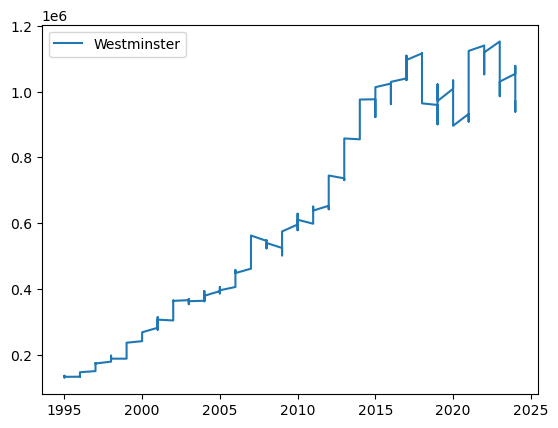

In [27]:
# iterate through all the boroughs
for i in properties["Borough"].iloc[0:32]:
    one_borough = properties[properties["Borough"] == i]
    
    # minus the oldest price from the lastest price to see how much price changed over time
    diff = one_borough["Average Price"].iloc[-1] - one_borough["Average Price"].iloc[0]
    print(diff)
    
    # plot Year vs Average Price for all the boroughs 
    plt.plot(one_borough["Year"], one_borough["Average Price"])
    plt.legend([i])
    plt.show()

# THE RESULT
# Kensington & Chelsea has the greatest house price increase in two decades. Secound is Westminster

In [28]:
# created a function for getting the ratio of Average Price from 1998 to 2018
def create_price_ratio(borough):
    sub_properties = properties[properties["Borough"] == borough]
    sub_year_1998 = sub_properties[sub_properties["Year"] == 1998]
    sub_year_2018 = sub_properties[sub_properties["Year"] == 2018]
    ratio = sub_year_1998["Average Price"].iloc[0] / sub_year_2018["Average Price"].iloc[-1]
    return ratio

# iterating through all the borough and get the ratio
for i in properties["Borough"].iloc[0:32]:
    ratio = create_price_ratio(i)
    print(ratio)

0.1913306123845364
0.21719451026030004
0.22355599716437985
0.19647483619735226
0.23082586640465308
0.19547712391481814
0.2325443758053794
0.22304696009434288
0.2277165639681225
0.19917415492470128
0.15241108330654507
0.2294645265450464
0.18542757971423104
0.23564040552722784
0.21835618216296196
0.22809439755954408
0.23267582199536685
0.19690719830133058
0.20007776186547052
0.23265139997757278
0.18828105402431317
0.17656738063711946
0.20245649004635094
0.18293984309020705
0.21486647085855465
0.23665985021499228
0.1644876999206719
0.23932571462560326
0.20555804848276624
0.16725446796573099
0.20031040919715565
0.18617217489893584
